In [1]:
import pandas as pd
import numpy as np

# CSV from JHU adapted via Excel to show the number of new cases in each country per day (Jan 23 to June 28)
newCases = pd.read_csv('time_series_covid19_newcases_global_June28.csv', index_col='Country/Region')

# Rotate the dataframe so countries = columns
newCases = newCases.transpose()

# Delete latitude and longitude rows
newCases = newCases.drop(['Lat', 'Long'])

# Display dataframe
newCases

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Aruba,Australia,Austria,...,United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/23/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/24/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/27/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/24/2020,159.0,67.0,172.0,0.0,8.0,2648.0,711.0,0.0,37.0,41.0,...,652.0,17.0,34836.0,328.0,179.0,3.0,159.0,23.0,12.0,5.0
6/25/2020,535.0,78.0,197.0,0.0,15.0,2606.0,771.0,0.0,37.0,28.0,...,1118.0,5.0,39972.0,187.0,197.0,0.0,54.0,61.0,8.0,21.0
6/26/2020,276.0,77.0,240.0,0.0,0.0,2886.0,759.0,0.0,6.0,45.0,...,1380.0,12.0,45255.0,250.0,216.0,1.0,175.0,13.0,34.0,10.0
6/27/2020,165.0,61.0,283.0,0.0,47.0,2401.0,662.0,0.0,85.0,58.0,...,890.0,5.0,42597.0,255.0,351.0,2.0,258.0,14.0,0.0,6.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab2b8d3e10>,
      dtype=object)

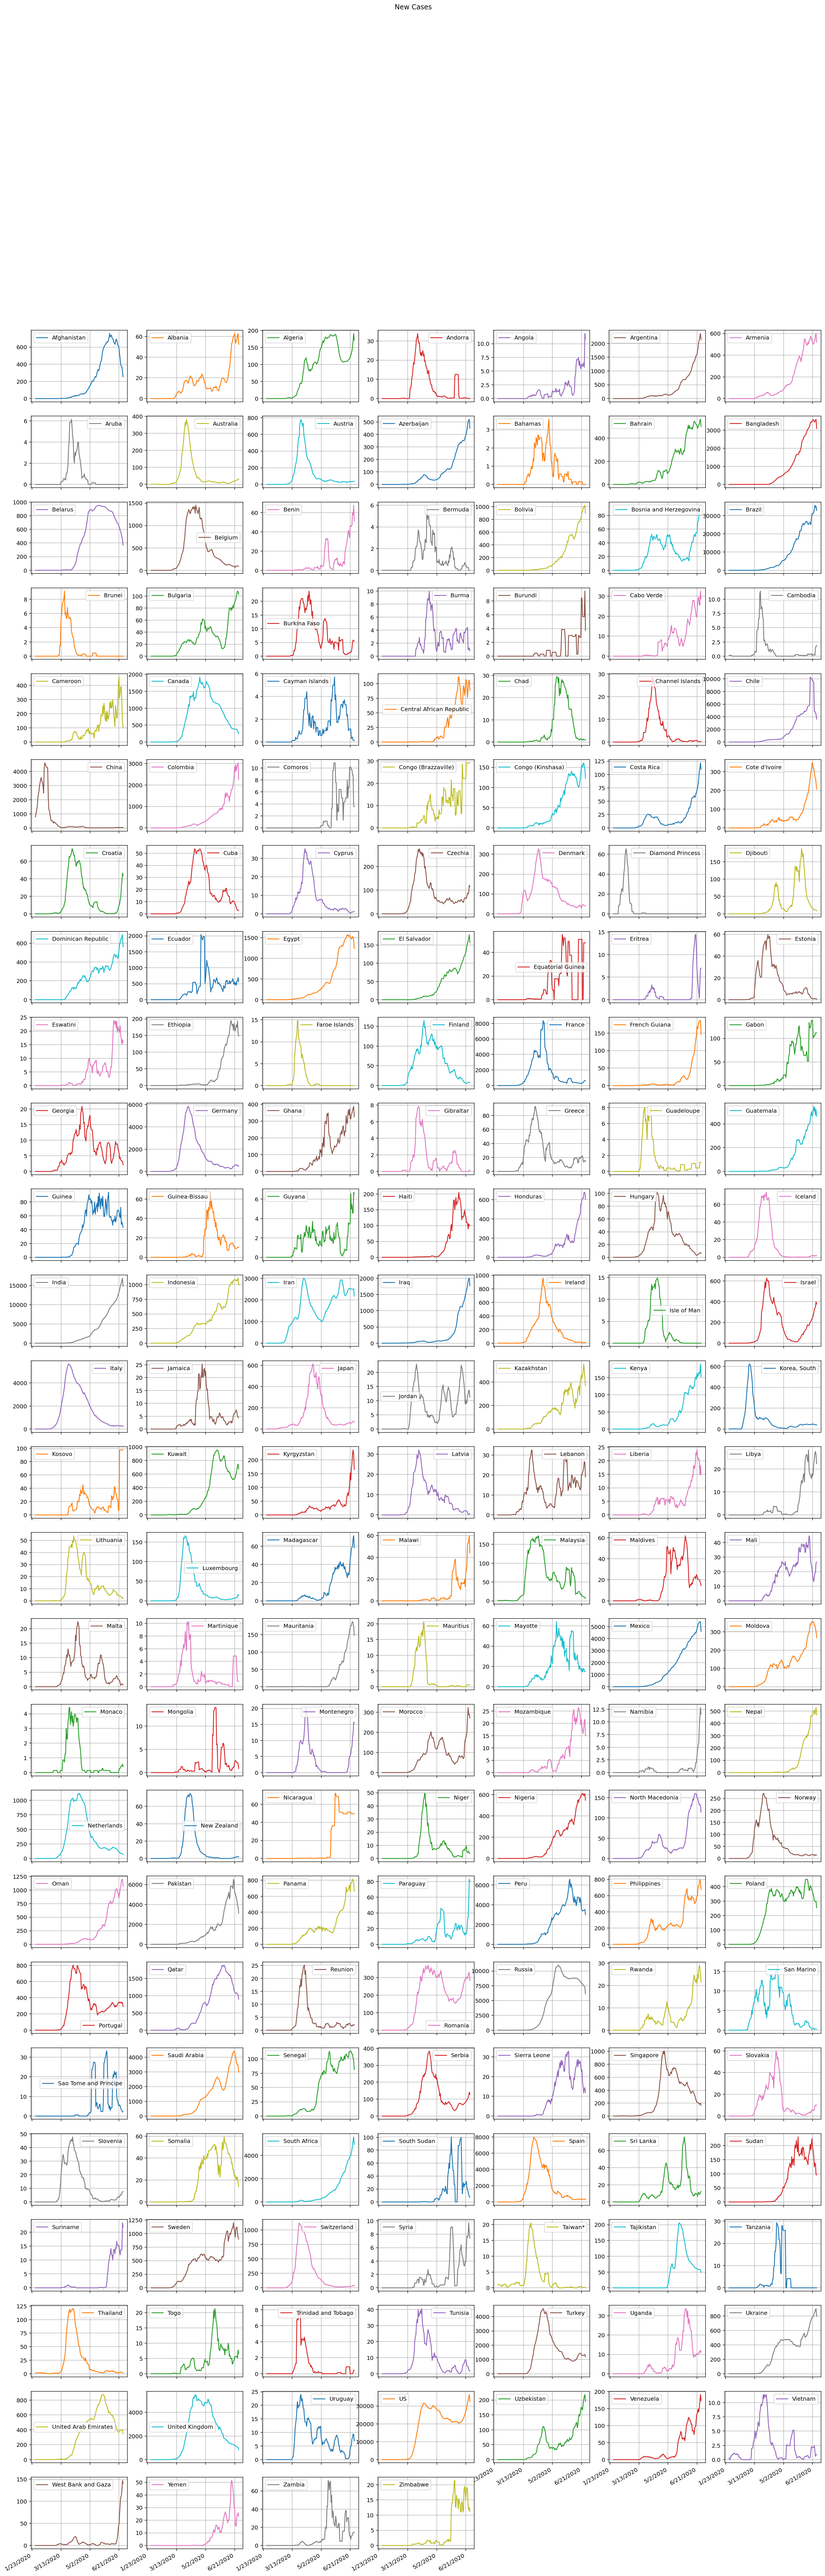

In [3]:
#newCases.plot.line(subplots=True)


# Plot each column of data as line plots. For missing data, connect the previous and following dots with line segments
#newCases.interpolate(method='linear').plot(kind='line', subplots=True, grid=True, title="New Cases", layout=(26, 7), figsize=(25,80))
newCases.interpolate(method='linear').rolling(7).mean().plot(kind='line', subplots=True, grid=True, title="New Cases", layout=(26, 7), figsize=(25,80))

[[ 0.24983722  2.07999753 -2.41574285 ... -0.44983528 -0.04794935
  -0.36425081]
 [-0.48628731  2.43254818 -2.81984222 ...  0.92336623 -0.5970967
  -0.78257457]
 [ 0.13037419  1.37164964 -1.48661612 ... -1.31814927 -1.18427125
   0.9759933 ]
 ...
 [ 1.41550613  1.62240137  0.14416404 ...  0.16085602 -1.49641226
  -1.15540842]
 [ 0.51261898  2.19777832  1.17804109 ...  1.58936424  0.47191777
   0.61252738]
 [ 1.57168812  0.69350518  0.90266833 ...  0.39698547 -0.56198203
   0.43276811]]


Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


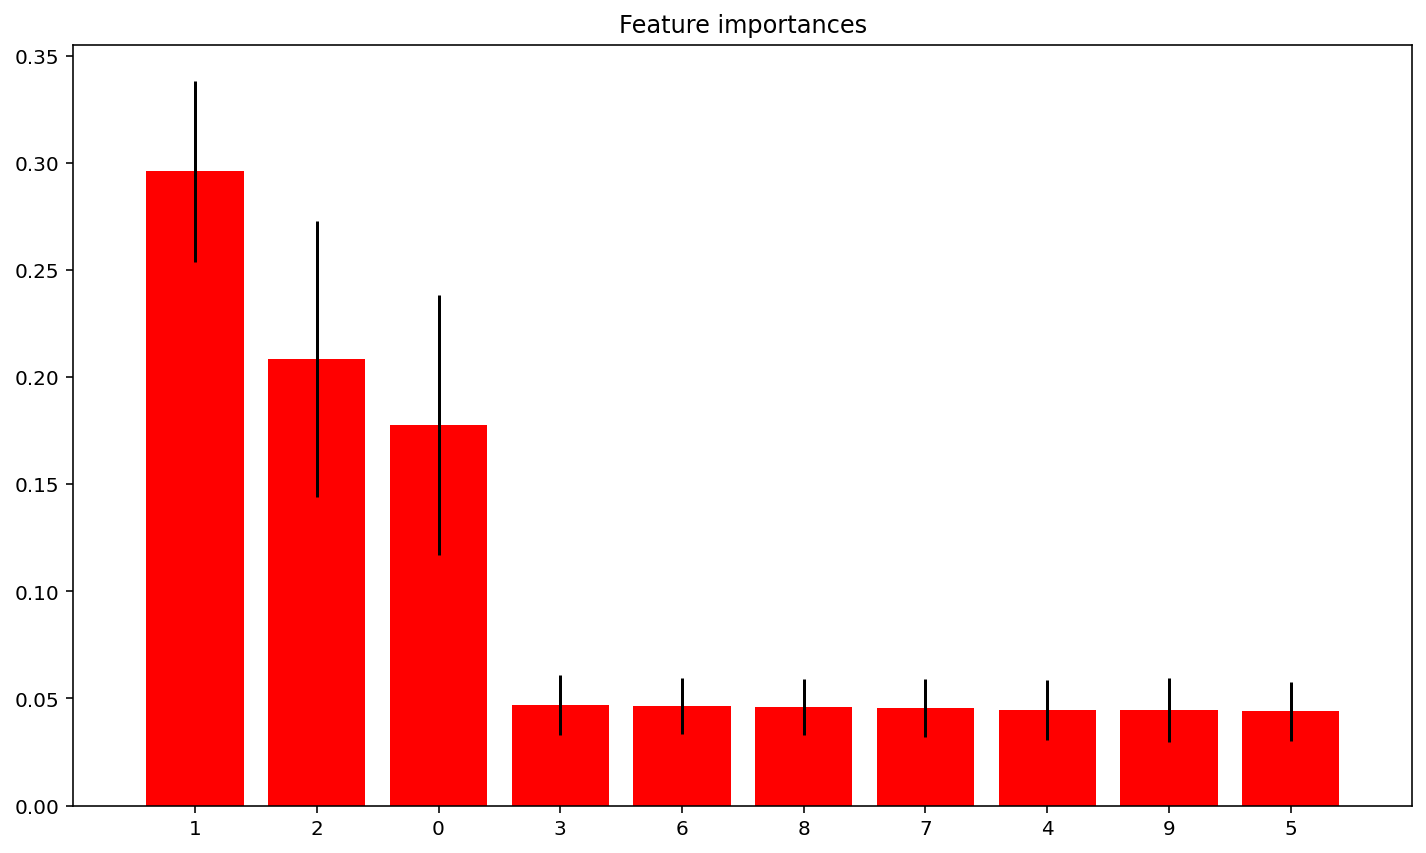

In [3]:
# Random forest

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [2]:
import numpy
import seaborn
import pandas
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import random

In [3]:
#print(X)
#print(y)

def KNN(X_train_, X_test_, y_train_, y_test_):
    parameters = {'n_neighbors':[3, 5, 10]}

    neigh = KNeighborsClassifier()

    clf = GridSearchCV(neigh, parameters)

    clf.fit(X_train_, y_train_)

    y_pred = clf.best_estimator_.predict(X_test_)
    le = preprocessing.LabelEncoder()
    y_test_encoded = le.fit_transform(y_test_)
    y_pred_encoded = le.transform(y_pred)
    
    # Compute accuracy, precision, recall
    clf_accuracy_score = accuracy_score(y_test_encoded, y_pred_encoded)
    clf_precision_score = precision_score(y_test_encoded, y_pred_encoded)
    clf_recall_score = recall_score(y_test_encoded, y_pred_encoded)
    return clf, clf_accuracy_score, clf_precision_score, clf_recall_score

def runKNN(X, y, iterations):
    quality = numpy.zeros([iterations,3])

    for counter in range(iterations):
        # Run KNN for the normalized X data and y
        X_normalized = normalize(X.to_numpy(), axis=0)
        X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25)
        clf_n, clf_accuracy_score, clf_precision_score, clf_recall_score = KNN(X_train, X_test, y_train, y_test)

        # Return accuracy, precision, and recall for both cases
        accuracy = clf_accuracy_score
        precision = clf_precision_score
        recall = clf_recall_score

        quality[counter,:] = numpy.array([accuracy, precision, recall])

    return numpy.mean(quality, axis = 0)

In [4]:
def pruneVariables(X,y,samples):

    columns = list(X)

    while len(columns) > 1:
        columns = list(X)
        random.shuffle(columns)
        print(columns)
        bestQualityChange = -1

        quality = runKNN(X,y,samples)
        print('With', len(columns), 'variables, we find quality metrics', quality)

        for column in columns:

            # Drop the column and find the change in quality with all variables
            newX = X.drop([column], axis=1)
            newQuality = runKNN(newX,y,samples)
            newQualityChange = newQuality - quality

            #print(list(newX))
            #print('The performance after losing the variable', column, 'is', newQuality)

            # If all metrics improve by removing a column, remove it and break the loop
            if (newQualityChange > 0).all():
                print('We are dropping column', column, 'because all quality metrics improved by', newQualityChange)
                X = newX
                break

            else:
                # Sum the losses. If it's better than all others so far, name this column the worstColumn
                sumOfNegQualityChange = sum((newQualityChange<0)*newQualityChange)
                #print(sumOfNegQualityChange)

                if sumOfNegQualityChange > bestQualityChange:
                    worstColumn = column
                    bestQualityChange = sumOfNegQualityChange

                if column == columns[-1]:
                    if bestQualityChange < -0.03:
                        print('Removing each variable results more than 3% sum of losses in the quality metrics')
                        return columns, quality

                    # Remove the worst column from X and columns
                    print('We are dropping column', worstColumn, 'and quality metrics changed by', bestQualityChange)
                    X = X.drop([worstColumn], axis=1)

In [6]:
import warnings
warnings.filterwarnings('ignore')

## PUT YOUR NEW STATE DATA HERE
data = pandas.read_csv('CountryData.csv')

X = data.drop(['Country', 'SecondPeak'], axis=1)
y = data.SecondPeak.to_numpy()

samples = 100

print(pruneVariables(X,y,samples))

['DayOfFirstCase', 'FirstPeakHeight', 'TotalCases', 'Maximum', 'MaxOverTotal', 'DaysFromFirstCaseToFirstPeak', 'DayOfMaximum', 'DaysFromFirstCaseToMax', 'DayOfFirstPeak']


With 9 variables, we find quality metrics [0.87466667 0.87355556 0.46135206]


We are dropping column TotalCases because all quality metrics improved by [0.01311111 0.02390368 0.01697466]
['DayOfMaximum', 'MaxOverTotal', 'FirstPeakHeight', 'Maximum', 'DaysFromFirstCaseToMax', 'DayOfFirstPeak', 'DayOfFirstCase', 'DaysFromFirstCaseToFirstPeak']


With 8 variables, we find quality metrics [0.89444444 0.90377228 0.50373769]


We are dropping column MaxOverTotal because all quality metrics improved by [0.01666667 0.05523565 0.03917911]
['DaysFromFirstCaseToFirstPeak', 'DayOfMaximum', 'DaysFromFirstCaseToMax', 'Maximum', 'DayOfFirstCase', 'FirstPeakHeight', 'DayOfFirstPeak']


With 7 variables, we find quality metrics [0.90555556 0.96582792 0.53708644]


We are dropping column Maximum and quality metrics changed by -0.0022446442446444337
['DayOfFirstCase', 'DayOfFirstPeak', 'FirstPeakHeight', 'DayOfMaximum', 'DaysFromFirstCaseToFirstPeak', 'DaysFromFirstCaseToMax']


With 6 variables, we find quality metrics [0.90711111 0.95953571 0.54995044]


We are dropping column DayOfFirstCase and quality metrics changed by -0.002666666666666706
['DaysFromFirstCaseToMax', 'DayOfMaximum', 'DaysFromFirstCaseToFirstPeak', 'FirstPeakHeight', 'DayOfFirstPeak']


With 5 variables, we find quality metrics [0.90977778 0.95716955 0.5668095 ]


We are dropping column DayOfFirstPeak because all quality metrics improved by [0.00733333 0.00789394 0.01302855]
['FirstPeakHeight', 'DaysFromFirstCaseToMax', 'DaysFromFirstCaseToFirstPeak', 'DayOfMaximum']


With 4 variables, we find quality metrics [0.91044444 0.96430952 0.53589322]


We are dropping column FirstPeakHeight because all quality metrics improved by [0.00733333 0.00226984 0.05631094]
['DaysFromFirstCaseToMax', 'DaysFromFirstCaseToFirstPeak', 'DayOfMaximum']


With 3 variables, we find quality metrics [0.91733333 0.95536905 0.60313431]


Removing each variable results more than 3% sum of losses in the quality metrics
(['DaysFromFirstCaseToMax', 'DaysFromFirstCaseToFirstPeak', 'DayOfMaximum'], array([0.91733333, 0.95536905, 0.60313431]))
